In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Housing.csv")



In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Now lets Plot the Input features against the Price feature

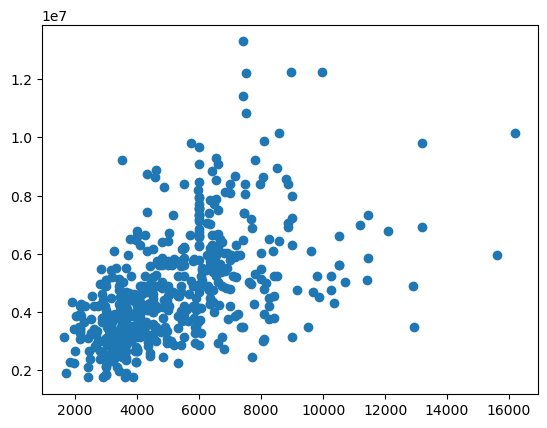

In [9]:
plt.scatter(df.area,df.price)
plt.show()

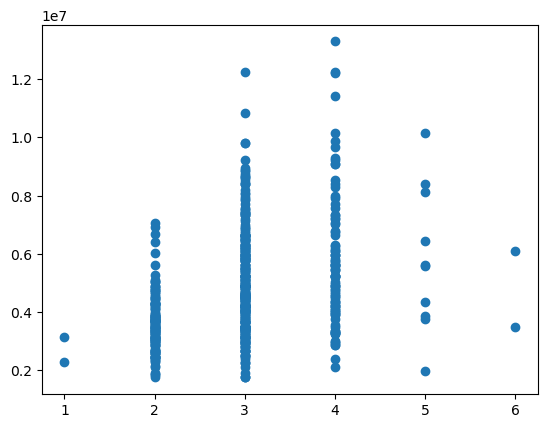

In [10]:
plt.scatter(df.bedrooms,df.price)
plt.show()

## There is a big difference between scales of features

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['area', 'price','bedrooms','stories']] = scaler.fit_transform(df[['area', 'price','bedrooms','stories']])



In [18]:
def loss_function(m1, m2, m3, b, points):
    # Extracting input features as a NumPy array
    X = points[['area', 'bedrooms', 'stories']].values
    # Extracting actual output as a NumPy array
    Y = points['price'].values
    
    # Calculating predicted output using vectorized operations
    predictions = np.dot(X, np.array([m1, m2, m3])) + b
    
    # Calculating Mean Squared Error using vectorized operations
    total_error = np.mean((Y - predictions) ** 2)
    
    # return Mean Squared error
    return total_error

In [19]:
import numpy as np

def gradient_descent(curr_m1, curr_m2, curr_m3, curr_b, points, learning_rate):
    # Extracting input features and actual output as NumPy arrays
    X = points[['area', 'bedrooms', 'stories']].values
    Y = points['price'].values
    
    N = len(points)
    
    # Computing predictions for all data points using vectorized operations
    predictions = np.dot(X, np.array([curr_m1, curr_m2, curr_m3])) + curr_b
    
    # Calculating gradients using vectorized operations
    m1_gradient = (-2/N) * np.sum(X[:, 0] * (Y - predictions))
    m2_gradient = (-2/N) * np.sum(X[:, 1] * (Y - predictions))
    m3_gradient = (-2/N) * np.sum(X[:, 2] * (Y - predictions))
    b_gradient = (-2/N) * np.sum(Y - predictions)
    
    # Updating the values of parameters using calculated gradients and previous values
    m1 = curr_m1 - (m1_gradient * learning_rate)
    m2 = curr_m2 - (m2_gradient * learning_rate)
    m3 = curr_m3 - (m3_gradient * learning_rate)
    b = curr_b - (b_gradient * learning_rate)
    
    # Returning updated values
    return m1, m2, m3, b
